# ЛР №3 Проведение исследований с решающим деревом
Датасеты: 'Loan new dataset' https://www.kaggle.com/datasets/willianoliveiragibin/financial-risk-v2 \
Задачей было определять, разрешат ли кредит клиенту - столбец LoanApproved (0 - не разрешено, 1 - разрешено) \
'medical_insurance' https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction \
Задачей было предсказывать цену страховки - столбец charges.

# 2. Решающее дерево

Загружаем датасет и смотрим его верхние строки

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "loan.csv"
data_class = pd.read_csv(file_path)
data_class.head()



,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.0,7.249.720.460.524.030,11,126928,19.965.200.000.000.000,22.758.963.035.547.000,4.198.059.915.607.370,18.107.719.782.539.400,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,33.090.833.333.333.300,9.351.320.992.549.320,3,43609,207.045,2.010.771.214.969.360,7.940.542.382.198.960,3.898.524.480.253.530,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,33.936.666.666.666.600,8.722.406.105.782.900,6,5205,21.762.700.000.000.000,21.254.800.984.525.700,6.664.066.876.774.690,4.621.569.652.325.320,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.0,8.961.547.069.636.460,5,99452,300.398,3.009.108.491.496.010,10.475.069.802.292.900,3.130.983.116.604.640,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8.605.333.333.333.330,9.413.687.393.229.140,5,227019,197.184,17.599.017.877.532.800,33.017.914.048.482.300,7.020.984.743.780.870,1,36.0


То же самое для датасета медицинской страховки

In [2]:
file_path2 = "medical_insurance.csv"
data_regr = pd.read_csv(file_path2)
data_regr.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Проведем чистку: удалим ненужный столбец ApplicationDate, кодируем категориальные фичи и разделим фичи на целевые и не целевые (как и в предыдущих лабораторных работах)

In [3]:
data_class_cleaned = data_class.drop(columns=['ApplicationDate'])

imputer = SimpleImputer(strategy='mean')
numerical_columns = data_class_cleaned.select_dtypes(include=['int64', 'float64']).columns
data_class_cleaned[numerical_columns] = imputer.fit_transform(data_class_cleaned[numerical_columns])

#кодирование категориальных фич

categorical_columns = data_class_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_class_cleaned[column] = le.fit_transform(data_class_cleaned[column].astype(str))
    label_encoders[column] = le

#разделение фич на целевую и не целевую
X = data_class_cleaned.drop(columns=['LoanApproved'])
y = data_class_cleaned['LoanApproved']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)


Кодируем фичи для датасета регрессии

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
categorical_columns = data_regr.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_regr[column] = le.fit_transform(data_regr[column].astype(str))
    label_encoders[column] = le

from sklearn.model_selection import train_test_split

X = data_regr.drop('charges', axis=1)
y = data_regr['charges']

X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X, y, test_size=0.2, random_state=42)

Обучение моделей решающего дерева регрессора и классификатора. В качестве метрики качества будем использовать accuracy для классификатора и MSE, R2 для регрессора.

In [5]:
model_tree_regr = DecisionTreeRegressor(random_state=42)
model_tree_regr.fit(X_train_regr, y_train_regr)

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_class, y_train_class)


DecisionTreeClassifier(random_state=42)

Посмотрим на результаты обучения:

In [6]:
predicted_class = model_tree.predict(X_test_class)

print("accuracy: ", metrics.accuracy_score(y_test_class, predicted_class))


accuracy:  0.987


Получаем достаточно высокие значения accuracy - 0.987.

In [7]:
predicted_regr = model_tree_regr.predict(X_test_regr)

print("MSE: ", metrics.mean_squared_error(y_test_regr, predicted_regr))
print("R2: ", metrics.r2_score(y_test_regr, predicted_regr))

MSE:  9654348.44394193
R2:  0.937097418327497


Получаем так же отличные результаты для регрессии - R2=0.937. Построим графики для обоих задач, чтобы визуализировать ошибки

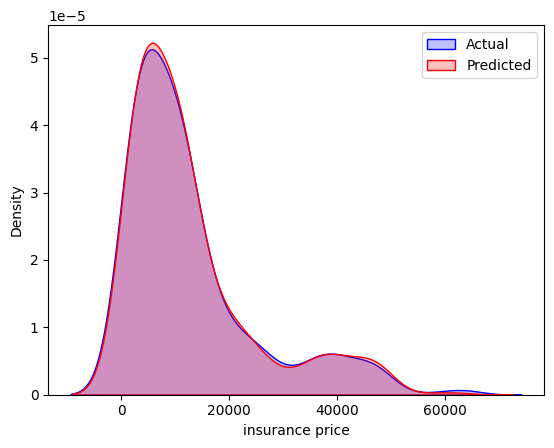

In [10]:
sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_regr, label='Predicted', color='red', fill=True)
plt.xlabel('insurance price')
plt.ylabel('Density')
plt.legend()
plt.show()

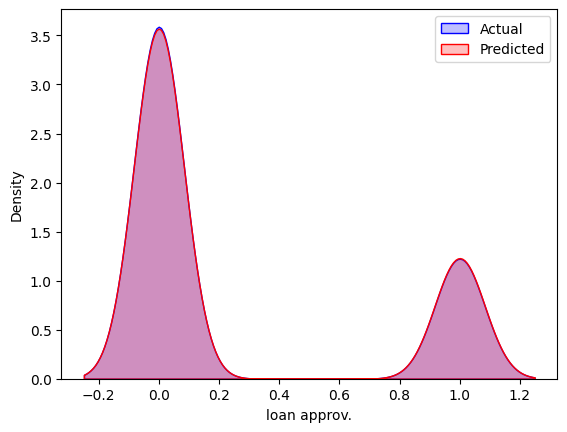

In [11]:
sns.kdeplot(y_test_class, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_class, label='Predicted', color='red', fill=True)
plt.xlabel('loan approv.')
plt.ylabel('Density')
plt.legend()
plt.show()

По итогу получаем очень хорошие значения точности для обоих задач

# Улучшение бейзлайна задачи классификации

Гипотезы для улучшения бейзлайна классификации: \
- Уменьшение глубины дерева решающего дерева может предотвратить переобучение
- Использование гиперпараметров для улучшения производительности (максимальное количество признаков, минимальное количество объектов в листе)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = data_class_cleaned.drop(columns=['LoanApproved'])
y = data_class_cleaned['LoanApproved']

#разделение на обучающую и тестовую выборки
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

# отмаасштабируем данные
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

param_grid = {
    'max_depth': [3, 5, 10, None],  #подберем глубину дерева
    'min_samples_split': [2, 5, 10],  # мин. число объектов для разделения
    'min_samples_leaf': [1, 2, 4],  # мин. число объектов в листах
    'max_features': ['sqrt', 'log2', None]  # макс числ признаков для разделения
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_class, y_train_class)

best_tree_model = grid_search.best_estimator_

predicted_class = best_tree_model.predict(X_test_class)

accuracy = metrics.accuracy_score(y_test_class, predicted_class)
print("accuracy:", accuracy)

accuracy: 0.98775


Гипотезы улучшили бейзлайн на 0.0007. Это немного, но и изначальная accuracy была очень высокой.

# Улучшение бейзлайна задачи регрессии
Теперь перейдем к задаче регрессии. Будем предсказывать charges

Гипотезы по улучшению: \
- Уменьшение глубины дерева (ограничение глубины решающего дерева, чтобы предотвратить переобучение) - попробуем разыые значения
- Попробуем разное число минимальных объектов в листе
- Попробовать различные критерии разделения

Улучш. MSE:  10197582.868136311
Улучш. R2:  0.9335579927584268


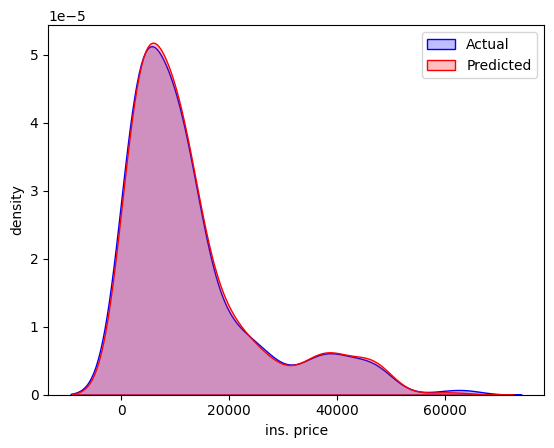

In [14]:
categorical_columns = data_regr.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_regr[column] = le.fit_transform(data_regr[column].astype(str))
    label_encoders[column] = le
X = data_regr.drop('charges', axis=1)
y = data_regr['charges']

X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_regr = scaler.fit_transform(X_train_regr)
X_test_regr = scaler.transform(X_test_regr)

param_grid = {
    'max_depth': [3, 5, 7, 10, None],  #пробуем разную глубину
    'min_samples_leaf': [1, 2, 4, 8],  #разное число разбиений
    'criterion': ['friedman_mse', 'poisson'],  #разные критерии для разделения
}

grid_search_regr = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_regr.fit(X_train_regr, y_train_regr)

best_tree_regr_model = grid_search_regr.best_estimator_

predicted_regr = best_tree_regr_model.predict(X_test_regr)

mse = metrics.mean_squared_error(y_test_regr, predicted_regr)
r2 = metrics.r2_score(y_test_regr, predicted_regr)
print("Улучш. MSE: ", mse)
print("Улучш. R2: ", r2)

sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_regr, label='Predicted', color='red', fill=True)
plt.xlabel('ins. price')
plt.ylabel('density')
plt.legend()
plt.show()

Видно, что улучшения бейзлайна не улучшили показатели R2 и MSE, но показатели точности в любом случае остаются крайне высокими.

# Самостоятельная имплементация решающего дерева для классификации

Определим класс классификатора со всеми необходимыми функциями:

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

class SimpleDecisionTreeClassifier:
    def __init__(self, max_d=5, min_samples=2):
        self.max_d = max_d
        self.min_samples = min_samples
        self.model = None

    def _create_tree(self, X, y, depth=0):
        if len(set(y)) == 1:
            return y[0]

        if self.max_d is not None and depth >= self.max_d:
            return self._majority(y)

        if len(y) < self.min_samples:
            return self._majority(y)

        split = self._best_split(X, y)
        if not split:
            return self._majority(y)

        l_idx = split['l_idx']
        r_idx = split['r_idx']

        left = self._create_tree(X[l_idx], y[l_idx], depth + 1)
        right = self._create_tree(X[r_idx], y[r_idx], depth + 1)

        return {
            'f_idx': split['f_idx'],
            'thresh': split['thresh'],
            'left': left,
            'right': right
        }

    def fit(self, X, y):
        self.model = self._create_tree(X, y)

    def predict(self, X):
        return np.array([self._classify(x, self.model) for x in X])

    def _best_split(self, X, y):
        best = {}
        min_gini = float('inf')

        for f_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, f_idx])
            for thresh in thresholds:
                l_idx = np.where(X[:, f_idx] <= thresh)[0]
                r_idx = np.where(X[:, f_idx] > thresh)[0]

                if len(l_idx) == 0 or len(r_idx) == 0:
                    continue

                l_y = y[l_idx]
                r_y = y[r_idx]
                gini = self._gini_impurity(l_y, r_y)

                if gini < min_gini:
                    min_gini = gini
                    best = {
                        'f_idx': f_idx,
                        'thresh': thresh,
                        'l_idx': l_idx,
                        'r_idx': r_idx
                    }

        return best

    def _gini_impurity(self, l_y, r_y):
        def gini(y):
            classes, counts = np.unique(y, return_counts=True)
            p = counts / len(y)
            return 1 - np.sum(p ** 2)

        l_gini = gini(l_y)
        r_gini = gini(r_y)
        total_gini = (l_gini * len(l_y) + r_gini * len(r_y)) / (len(l_y) + len(r_y))
        return total_gini

    def _majority(self, y):
        classes, counts = np.unique(y, return_counts=True)
        return classes[np.argmax(counts)]

    def _classify(self, x, tree):
        if not isinstance(tree, dict):
            return tree

        f_idx = tree['f_idx']
        thresh = tree['thresh']

        if x[f_idx] <= thresh:
            return self._classify(x, tree['left'])
        else:
            return self._classify(x, tree['right'])

    def get_params(self, deep=True):
        return {'max_d': self.max_d, 'min_samples': self.min_samples}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self



Проведем все те же действия - обучим бейзлайн

accuracy: 0.985


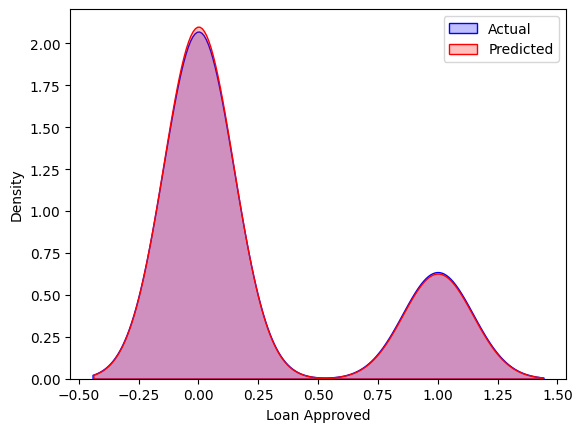

In [16]:
file_path = "loan.csv"
data_class = pd.read_csv(file_path)

data_class_cleaned = data_class.drop(columns=['ApplicationDate'])

categorical_columns = data_class_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_class_cleaned[column] = le.fit_transform(data_class_cleaned[column].astype(str))
    label_encoders[column] = le

data_class_cleaned = data_class_cleaned.sample(frac=0.05, random_state=42)
X_class = data_class_cleaned.drop(columns=['LoanApproved'])
y_class = data_class_cleaned['LoanApproved'].values

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

tree_classifier = SimpleDecisionTreeClassifier()
tree_classifier.fit(X_train_class, y_train_class)

predicted_class = tree_classifier.predict(X_test_class)

#оценка
accuracy = accuracy_score(y_test_class, predicted_class)
print("accuracy:", accuracy)


sns.kdeplot(y_test_class, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_class, label='Predicted', color='red', fill=True)
plt.xlabel('Loan Approved')
plt.ylabel('Density')
plt.legend()
plt.show()


Видно, что собственная реализация модели хоть и имеет высокий уровень accuracy, но он все же меньше, чем у библиотечной, на 0.02. Применим те же гипотезы по улучшнению качества модели.

In [21]:
X = data_class_cleaned.drop(columns=['LoanApproved']).values
y = data_class_cleaned['LoanApproved'].values

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

param_grid = {
    'max_d': [3, 5, None],
    'min_samples': [2],
}

grid_search = GridSearchCV(SimpleDecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_class, y_train_class)

best_model = grid_search.best_estimator_
predicted_class = best_model.predict(X_test_class)

improved_accuracy = accuracy_score(y_test_class, predicted_class)
print("improv. accuracy:", improved_accuracy)



improv. accuracy: 0.985


Видим, что собственная реализация (после применения гипотез) все же не проявляет ту же точность, что и модель sklearn.

# Самостоятельная имплементация решающего дерева регрессии:

Перейдем к самостоятельной имплементации регрессии. Опишем класс, повторим действия по обучению

In [22]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class SimpleDecisionTreeRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, max_depth=None, min_samples_leaf=1, criterion='mse'):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.tree_ = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        if self.criterion not in ['mse']:
            raise NotImplementedError(f"Criterion '{self.criterion}' не реализован. Используйте 'mse'.")

        self.tree_ = self._build_tree(X, y, depth=0)
        return self

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_sample(x, self.tree_) for x in X])

    def _build_tree(self, X, y, depth):
        if self.max_depth is not None and depth >= self.max_depth:
            return {'type': 'leaf', 'value': np.mean(y)}

        if len(y) <= self.min_samples_leaf:
            return {'type': 'leaf', 'value': np.mean(y)}

        if np.all(y == y[0]):
            return {'type': 'leaf', 'value': y[0]}

        best_split = self._find_best_split(X, y)
        if best_split is None:
            return {'type': 'leaf', 'value': np.mean(y)}

        left_mask = X[:, best_split['feature']] <= best_split['threshold']
        right_mask = ~left_mask

        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'type': 'node',
            'feature': best_split['feature'],
            'threshold': best_split['threshold'],
            'left': left_subtree,
            'right': right_subtree
        }

    def _find_best_split(self, X, y):
        best_mse = float('inf')
        best_split = None

        n_features = X.shape[1]

        current_mse = self._mse(y)

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for t in thresholds:
                left_mask = X[:, feature] <= t
                right_mask = ~left_mask

                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue

                left_y = y[left_mask]
                right_y = y[right_mask]

                left_mse = self._mse(left_y)
                right_mse = self._mse(right_y)
                weighted_mse = (len(left_y)*left_mse + len(right_y)*right_mse) / len(y)

                if weighted_mse < best_mse:
                    best_mse = weighted_mse
                    best_split = {
                        'feature': feature,
                        'threshold': t
                    }

        if best_split is None or best_mse >= current_mse:
            return None
        return best_split

    def _mse(self, y):
        mean_y = np.mean(y)
        return np.mean((y - mean_y)**2)

    def _predict_sample(self, x, node):
        if node['type'] == 'leaf':
            return node['value']

        if x[node['feature']] <= node['threshold']:
            return self._predict_sample(x, node['left'])
        else:
            return self._predict_sample(x, node['right'])

    def get_params(self, deep=True):
        return {
            'max_depth': self.max_depth,
            'min_samples_leaf': self.min_samples_leaf,
            'criterion': self.criterion
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self



Обучим бейзлайн модель на собственной реализации решающего дерева:

MSE: 10113378.319010021
R2: 0.9341066246582767


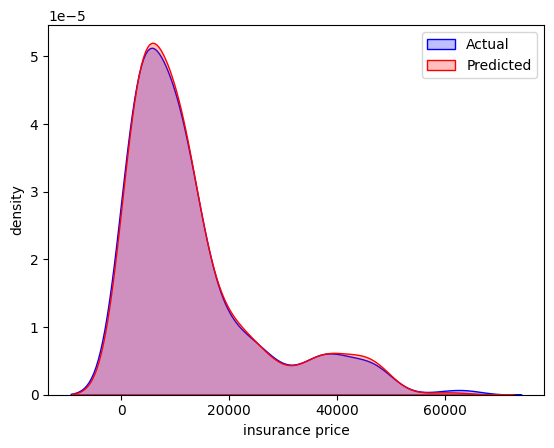

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = data_regr.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_regr[column] = le.fit_transform(data_regr[column].astype(str))
    label_encoders[column] = le

X = data_regr.drop('charges', axis=1).values
y = data_regr['charges'].values

X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_regr = scaler.fit_transform(X_train_regr)
X_test_regr = scaler.transform(X_test_regr)

baseline_regr = SimpleDecisionTreeRegressor(max_depth=None, min_samples_leaf=1, criterion='mse')
baseline_regr.fit(X_train_regr, y_train_regr)

predicted_regr_baseline = baseline_regr.predict(X_test_regr)

mse_baseline = metrics.mean_squared_error(y_test_regr, predicted_regr_baseline)
r2_baseline = metrics.r2_score(y_test_regr, predicted_regr_baseline)

print("MSE:", mse_baseline)
print("R2:", r2_baseline)

sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_regr_baseline, label='Predicted', color='red', fill=True)
plt.xlabel('insurance price')
plt.ylabel('density')
plt.legend()
plt.show()


Получаем R2 0.934, что высоко, но все же немного меньше, чем у бейзлайн модели из sklearn. Теперь применим гпиотезы по улучшению

Улучш. MSE:  10113378.319010021
Улучш. R2:  0.9341066246582767


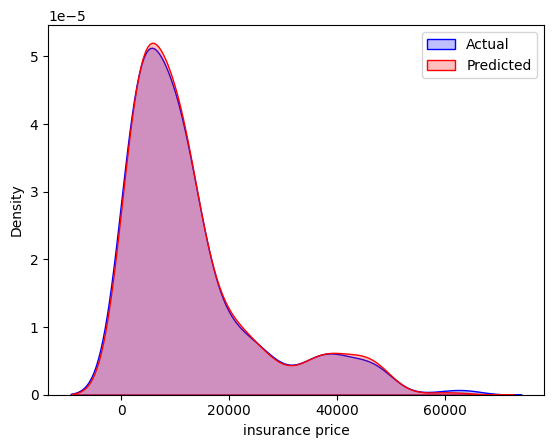

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = data_regr.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_regr[column] = le.fit_transform(data_regr[column].astype(str))
    label_encoders[column] = le

X = data_regr.drop('charges', axis=1).values
y = data_regr['charges'].values

X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_regr = scaler.fit_transform(X_train_regr)
X_test_regr = scaler.transform(X_test_regr)

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['mse']
}

grid_search_regr = GridSearchCV(SimpleDecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_regr.fit(X_train_regr, y_train_regr)

best_tree_regr_model = grid_search_regr.best_estimator_
predicted_regr = best_tree_regr_model.predict(X_test_regr)

mse = metrics.mean_squared_error(y_test_regr, predicted_regr)
r2 = metrics.r2_score(y_test_regr, predicted_regr)
print("Улучш. MSE: ", mse)
print("Улучш. R2: ", r2)

sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_regr, label='Predicted', color='red', fill=True)
plt.xlabel('insurance price')
plt.ylabel('Density')
plt.legend()
plt.show()


Видим, что улучшения ни привели к значительному улучшению результата - собственная реализация и библиотечная имеют очень схожую точность, но в целом все равно довольно высокую - 0.934 R2.